In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [21]:
#File path to the csv file
csv_file = "https://raw.githubusercontent.com/cassieview/wine-quality-azure-ml-visual-interface/master/dataset/winequality-red.csv"

# Read csv file into dataframe
df = pd.read_csv(csv_file)

# Print first 5 rows in the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityBool
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
qualityBool             1599 non-null int64
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


C:\Users\casiljan\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


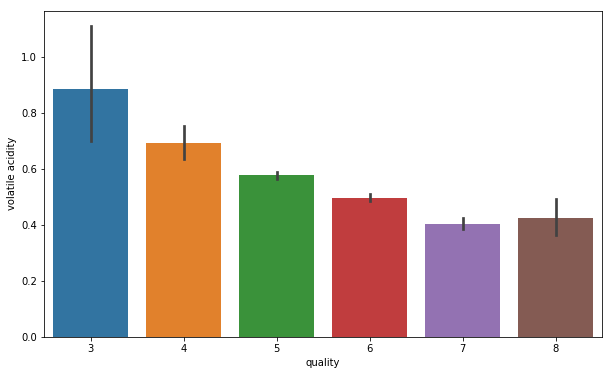

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

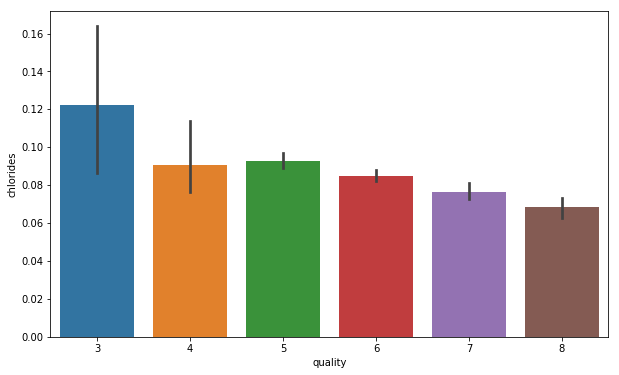

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

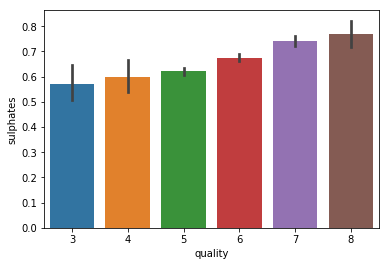

In [25]:
sns.barplot(x="quality", y="sulphates", data=df);

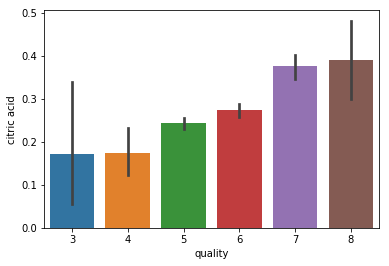

In [26]:
sns.barplot(x = 'quality', y = 'citric acid', data = df)

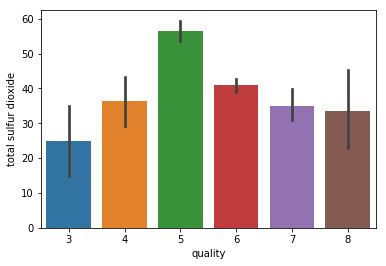

In [27]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

In [28]:
#X= df[['fixed acidity','volatile acidity','citric acid',
#       'residual sugar','chlorides','free sulfur dioxide',
#       'total sulfur dioxide','density','pH','sulphates','alcohol']]
X= df[['volatile acidity','citric acid','chlorides','sulphates','alcohol']]
y = df['qualityBool']
X.head()

,volatile acidity,citric acid,chlorides,sulphates,alcohol
0,0.70,0.00,0.076,0.56,9.4
1,0.88,0.00,0.098,0.68,9.8
2,0.76,0.04,0.092,0.65,9.8
3,0.28,0.56,0.075,0.58,9.8
4,0.70,0.00,0.076,0.56,9.4


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
X_test.head()

,volatile acidity,citric acid,chlorides,sulphates,alcohol
1109,0.470,0.43,0.171,0.76,10.8
1032,0.820,0.00,0.095,0.53,9.6
1002,0.290,0.33,0.063,0.84,11.7
487,0.645,0.36,0.053,0.42,10.0
979,0.450,0.49,0.075,0.63,10.4


In [31]:
Y_train.shape

(1119,)

In [32]:
Y_test.shape

(480,)

In [33]:
#run alg
svm= SVC()
model = CalibratedClassifierCV(svm).fit(X_train, Y_train)
# evaluate the test set
accuracy = model.score(X_test, Y_test)
# log accuracy which is a single numerical value
print ("Accuracy is {}".format(accuracy))


Accuracy is 0.7583333333333333


C:\Users\casiljan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\casiljan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\casiljan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\casiljan\AppData\Lo

In [62]:
lrmodel = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, Y_train)
# evaluate the test set
lraccuracy = lrmodel.score(X_test, Y_test)
# log accuracy which is a single numerical value
print ("Accuracy is {}".format(lraccuracy))

Accuracy is 0.75


In [63]:
dtmodel =DecisionTreeClassifier(random_state=0).fit(X_train, Y_train)
# evaluate the test set
dtaccuracy = dtmodel.score(X_test, Y_test)
# log accuracy which is a single numerical value
print ("Accuracy is {}".format(dtaccuracy))

Accuracy is 0.7604166666666666


In [36]:
# calculate and log precision, recall, and thresholds, which are list of numerical values
y_scores = model.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores[:,1],pos_label=1)

# serialize the model on disk in the 'outputs' folder
#print ("Export the model to " + model_name)
#with open('cat_insert_procedure_model.pkl', 'wb') as fid:
#    joblib.dump(model, fid)

In [42]:
#print('accuracy: '+ str(accuracy)+' precision: '+ str(precision)+' recall: '+ str(recall)+' thresholds: '+ str(thresholds))

In [80]:
x_test_item = np.array(X_test.iloc[0]).reshape(-1,5)

In [87]:
print("Result should be: {}".format(Y_test.iloc[0]))

Result should be: 1


In [89]:
#test lr individual result
lrresult = lrmodel.predict(x_test_item)
print("Logistic model prediction is {}".format(lrresult[0]))

Logistic model prediction is 1


In [90]:
#test dt individual result
dtresult = dtmodel.predict(x_test_item)
print("Decision Tree model prediction is {}".format(dtresult[0]))

Decision Tree model prediction is 1


In [91]:
#test SVC individual result
result = model.predict(x_test_item)
print("SVC model prediction is {}".format(result[0]))

SVC model prediction is 1
